In [26]:
def bubble_sort(arr):
  # どこにあるbubble-sort
  change = True
  while change:
    change = False
    for i in range(len(arr) - 1):
      if arr[i].distance > arr[i + 1].distance:
        arr[i].distance, arr[i + 1].distance = arr[i + 1].distance, arr[i].distance
        change = True
  return arr

- good1
  - 特徴点描画のための間引き済み配列
- good2
  - ソートのための間引き済み配列
- good3
  - 最も似ている順にソートされた配列

img2:  (83.90914916992188, 51.39352798461914)
target:  (888.7014770507812, 968.4100341796875)


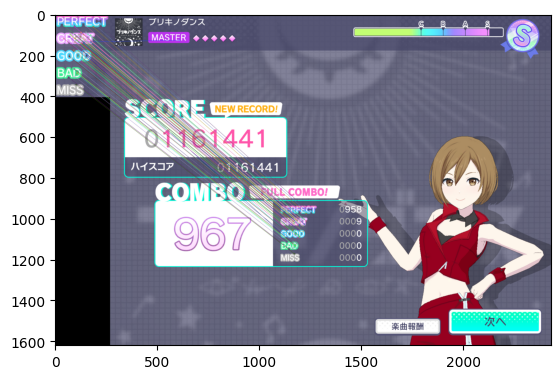

In [41]:
import cv2
import matplotlib.pyplot as plt

# 検索する部分
img1 = cv2.cvtColor(cv2.imread("img2.png"), cv2.COLOR_BGR2RGB)
# 検索対象
img2 = cv2.cvtColor(cv2.imread("../targets/normal.png"), cv2.COLOR_BGR2RGB)

# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()                                

# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) , None)
kp2, des2 = akaze.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) , None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher()

# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.knnMatch(des1, des2, k=2)

# データを間引きする
ratio = 0.75
good1 = []
good2 = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good1.append([m])
        good2.append(m)

# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good1, None, flags=2)

plt.imshow(img3)

good3 = bubble_sort(good2)

# 最も似ている基準点の座標
print('img2: ', kp1[good3[0].queryIdx].pt)
print('target: ', kp2[good3[0].trainIdx].pt)